<a href="https://colab.research.google.com/github/jfgf11/Problema-Especial/blob/master/Problema_Especial_Italiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Se monta el Drive para importar y guardar los datos y modelos.
from google.colab import drive
drive.mount('/content/drive')#,force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Se instalan las librerias necesarias
!pip install librosa
!pip install progressbar2

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Importar

In [0]:
import matplotlib.pyplot as plt

# Tensor Flow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

# Recopilacion de datos
import xml.dom.minidom
from scipy.io import wavfile
import numpy as np

# Para el preprocesamiento
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from collections import Counter

import librosa
import progressbar


# Import libraries 
import librosa.display
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings


#Redes neuronales sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




from sklearn.utils.class_weight import compute_class_weight



# Funciones Resultados

In [0]:
# De los creadores de EntrenamientoModelo*
def graficarMatrizConfusion(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  

  plt.figure(figsize=(8,8))

  ax = sns.heatmap(cm, annot = True, cbar = False);
      
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')
      
  plt.xlabel("Clase Prediccion")
  plt.ylabel("Clase Verdadera")
  plt.title("Matriz de Confusion")

  plt.show()
  

# Cargar y guardar modelos

In [0]:
# De los creadores de EntrenamientoModelo*
#Estas funciones permiten guardar y cargar un modelo, a partir de las rutas indicadas por parametro.
def guardarModelo(pModelo, pRutaModelo, pRutaPesos, pRutaDiagrama):
  modelo_json = pModelo.to_json()

  with open(pRutaModelo, "w") as archivo_json:
      archivo_json.write(modelo_json)

  pModelo.save_weights(pRutaPesos)

  plot_model(pModelo, to_file = pRutaDiagrama, show_shapes = True)

def cargarModelo(pRutaModelo, pRutaPesos):
  archivo_json = open(pRutaModelo, 'r')
  modelo_json = archivo_json.read()
  archivo_json.close()
  modelo = model_from_json(modelo_json)

  modelo.load_weights(pRutaPesos)

  return modelo

Guardar modelo

In [0]:
Nombre = "Jorge"
Numero = "1"
#utaModelo = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Modelo_"+Nombre+"_"+Numero+".json"
#rutaPesos = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Pesos_Modelo_"+Nombre+"_"+Numero+".h5"
#rutaDiagrama = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Diagrama_Modelo_"+Nombre+"_"+Numero+".png"

#guardarModelo(modelo1, rutaModelo, rutaPesos, rutaDiagrama)


Cargar Modelo

In [0]:
Nombre = "Jorge"
Numero = "1"
#rutaModelo = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Modelo_"+Nombre+"_"+Numero+".json"
#rutaPesos =  "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Pesos_Modelo_"+Nombre+"_"+Numero+".h5"
#modelo1 = cargarModelo(pRutaModelo=rutaModelo, pRutaPesos=rutaPesos)

In [0]:
#a = np.zeros(1280000000)

# Recopilación de Datos

In [0]:
def ObtenerSonidos(Inicial_pNXML,   Final_pNXML,    Inicial_nAudios,               Final_nAudios,
                  ventana_Tiempo=0.1,         salto_de_ventana=4,    Calcular_Features=False,       Sin_Background = False,
                  rutaDatosXML="drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training",
                  rutaDatosSounds ="drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds", Solo_Background = False,
                  sample_rate = 32000, MFCC = False, window_length_stft= 0.032, Step_size_stft=0.01, Espectogram = False ):


  NMV = round(ventana_Tiempo*sample_rate) # Numero de muestras por ventana
  NMV_advance = round(NMV/salto_de_ventana) # Numero de muestras por las cuales se avanza

  if Calcular_Features: datos_x_totales=np.zeros((1,312)) 
  else: datos_x_totales=np.zeros((int(1280000000/NMV),NMV))
  datos_y_totales=np.zeros(int(1280000000/NMV))
  contador=0

  with progressbar.ProgressBar(max_value=(Final_pNXML-Inicial_pNXML+1)*(Final_nAudios-Inicial_nAudios+1)) as bar:
    longitud_actual = 0
    for i in range(Inicial_pNXML_,(Final_pNXML_+1)):
        
        if i<10:  h="0" # Se hace esto debido que en los audios hay elementos 00001_01 y 00010_1
        else: h=""

        doc = xml.dom.minidom.parse(rutaDatosXML + "/000" + h + str(i) + ".xml")
        start = doc.getElementsByTagName("STARTSECOND") #Vector que contiene el tiempo en segundos de inicio de todos los eventos 
        finish = doc.getElementsByTagName("ENDSECOND") #Vector que contiene el tiempo en segundos de finalizacion de todos los eventos
        ID = doc.getElementsByTagName("CLASS_ID") # Vector que contiene la etiqueta de cada uno de los eventos
        events = doc.getElementsByTagName("events") # Indica informacion de todos los eventos en un archivo xml (tamaño)
        a, b, c, d=(events[0].attributes["size"].value) #Se obtiene el numero de eventos en un audio
        nEventos = int(c+d) # numero de eventos en un audio


        for a in range(Inicial_nAudios, (Final_nAudios)+1):# Numero de audios por xml
          if a<2: # Se hace esto debido que en los audios hay elementos 00001_01 y 00010_1
            r = "0"
            t=str(a)
          else:
            t=str(a-1)
            r=""
          frameData, fs = librosa.load(rutaDatosSounds + '/000' + h + str(i) +'_'+ r + t +'.wav', sr=sample_rate, res_type='kaiser_fast') #Audio seleccionado
          datos_x = (librosa.util.frame(frameData, frame_length=NMV, hop_length=NMV_advance)).T # Reorganiza los datos dándole saltos de tiempo de NMV_advance y el número de muestras por ventana NMV
          datos_y = np.zeros(len(frameData)) #Etiquetas de cada uno de los datos, los datos no asignados serán 0 y corresponderan a sonido ambiente

          for j in range(0,nEventos): # Se recorre el numero de eventos para cada xml
            startFrame = float(str(start[j].firstChild.data))*fs #Posicion inicial de evento con respecto a frameData
            endFrame = float(str(finish[j].firstChild.data))*fs #Posicion final de evento con respecto a frameData
            label = ID[j].firstChild.data #etiqueta del evento

            datos_y[round(startFrame):round(endFrame)]=int(label) # Se asigna la etiqueta a cada uno de los datos recopilados

          datos_y = (((stats.mode(librosa.util.frame(datos_y, frame_length=NMV, hop_length=NMV_advance)))[0]).T)# Con esto se asigna la etiqueta a datos desplazados en el tiempo
          datos_y = np.reshape(datos_y, (-1), 'F')

          if Sin_Background: # Si se quieren datos sin background
            datos_x = datos_x[datos_y!=0,:]
            datos_y =  datos_y[datos_y!=0]
          
          if Solo_Background:
            datos_x = (datos_x[datos_y==0,:])[0:round(len(datos_y[datos_y==0])),:]
            datos_y =  (datos_y[datos_y==0])[0:round(len(datos_y[datos_y==0]))]

          longitud_siguiente = longitud_actual + len(datos_y)
          datos_y_totales[longitud_actual:longitud_siguiente] = datos_y
          datos_x_totales[longitud_actual:longitud_siguiente,:] = datos_x
          longitud_actual = longitud_siguiente
          

          contador+=1
          bar.update(contador) #Se actualiza la barra de progreso
          
    datos_x_totales = datos_x_totales[0:longitud_siguiente,:]
    datos_y_totales = datos_y_totales[0:longitud_siguiente]

    datos_y_totales[datos_y_totales==4] = 1
    dato_x2_totales = None
    if MFCC or Espectogram: # Se crea el Spectogram para cada dato
      dato_x2_totales = Crear_Datos_MFCC_o_Espectogram(datos_x_totales ,fs, window_length_stft, Step_size_stft,MFCC, Espectogram)

    
  return datos_x_totales, dato_x2_totales ,datos_y_totales

Datos Espectograma

In [0]:
def Crear_Datos_MFCC_o_Espectogram(pX,sr_, window_length_stft, Step_size_stft,MFCC, Espectogram):
  contador=0
  with progressbar.ProgressBar(max_value=(len(pX))) as bar:
    if Espectogram:
      if window_length_stft>=0.05 and window_length_stft>=0.025: ps = librosa.feature.melspectrogram(y=pX[0],  sr=sr_, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_))
      else: ps = librosa.feature.melspectrogram(y=pX[0],  sr=sr_)
    elif MFCC:
      if window_length_stft>=0.05 and window_length_stft>=0.03125: ps = librosa.feature.mfcc(y=pX[0], sr=fs, n_mfcc=13, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_), htk=True )
      else: ps = librosa.feature.mfcc(y=pX[0], sr=fs, n_mfcc=13)

    x_2 = np.zeros((len(pX)+1,len(ps),len(ps[0])))
    for i in range(0,len(pX)):
      if Espectogram:
        if window_length_stft>=0.05 and window_length_stft>=0.025: ps = librosa.feature.melspectrogram(y=pX[i],  sr=sr_, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_))
        else: ps = librosa.feature.melspectrogram(y=pX[i],  sr=sr_)
        ps = librosa.power_to_db(ps, ref=np.max)
      elif MFCC:
        if window_length_stft>=0.05 and window_length_stft>=0.03125: ps = librosa.feature.mfcc(y=pX[i], sr=fs, n_mfcc=13, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_), htk=True )
        else: ps = librosa.feature.mfcc(y=pX[i], sr=fs, n_mfcc=13)
      x_2[i] = ps
      contador+=1
      bar.update(contador) #Se actualiza la barra de progreso
  x_2 = x_2[0:-1,:]
  return x_2

Lo siguiente permite obtener los datos de sonido y guardarlos. Al final se obtiene y se guarda lo siguiente:

x: Vector que contiene datos crudos de sonido pasados por una ventana de hammin

x2: Vector que contiene MFCC o Espectogramas


y: Vector que contiene las etiquetas de todos los datos

In [0]:
ventana_Tiempo_ = 0.050 # La ventana de tiempo de cada muestra (XX_ms) 
ventana_Tiempo_String_ = "050" # La ventana de tiempo de cada muestra (XX_ms) 
salto_de_ventana_ = 4  # Corrimiento en tiempo (XXms/4)
sample_rate_ = 16000 # Tasa remuestreo
sample_rate_String = str(sample_rate_)
# Si se está obteniendo el espectogramo, el valor de la ventana no puede ser menor a 0.025s
# Si se está obteniendo el MFCC, el valor de la ventana no puede ser menor a 0.03125s
window_length_stft_ = 0.025 # Ventana de tiempo para la short-Time Fourier Transform
Step_size_stft_ = 0.010 # Saltos el en tiempo para la transformada de Fourier, fíjenlo menor a la ventana stft, si quieren pueden aumentar

Sin_Background_ = False # True: no se obtienen datos de background; False: No se obtienen datos de background  NO MOVER
Features_ = False # Obtener o no features NO MOVER
Inicial_pNXML_ = 1 # Número inicial de archivos XML utilizados  NO MOVER, a menos de que se quiera obtener 45 a 55
Final_pNXML_ = 10 # Número final de archivos XML utilizados  NO MOVER, a menos de que se quiera obtener 45 a 55
Inicial_nAudios_ = 0 # Número inicial de audios que se obtendrán (esto no aplica para nuestros audios)  NO MOVER
Final_nAudios_ = 7 # Número final de audios que se obtendrán (esto no aplica para nuestros audios)  NO MOVER
rutaDatosXML_ = "drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training" #Ruta para encontrar archivos xml  NO MOVER
rutaDatosSounds_ = "drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds"  #Ruta para encontrar Audios  NO MOVER
Solo_Background_ = False #Solo obtener datos de background  NO MOVER
Nombre = "Jorge" ## PONER NOMBRE QUIEN REALIZA LA PRUEBA
#a,b,c,d,e=str(ventana_Tiempo_)


# Si ambos son True, se obtendrá únicamente el espectogram
Espectogram_ = True #Calcular el espectograma
MFCC_ = False #Calcular a su vez el MFCC  


x, x2, y =ObtenerSonidos(Inicial_pNXML = Inicial_pNXML_, Final_pNXML = Final_pNXML_,     Inicial_nAudios = Inicial_nAudios_,
                    Final_nAudios = Final_nAudios_,  ventana_Tiempo=ventana_Tiempo_, salto_de_ventana=salto_de_ventana_, 
                    Calcular_Features=Features_,        Sin_Background =Sin_Background_, 
                    rutaDatosXML = rutaDatosXML_,   rutaDatosSounds=rutaDatosSounds_, Solo_Background = Solo_Background_, 
                    sample_rate=sample_rate_,        MFCC=MFCC_, window_length_stft= window_length_stft_, Step_size_stft=Step_size_stft_
                    ,Espectogram = Espectogram_)

if Sin_Background_: Back = "_SIN_BACK"
elif Solo_Background_: Back = "_SOLO_BACK"
else: Back = ""
if Features_: Features_or_raw = " Features"
else: Features_or_raw = " raw_Conv"

if Espectogram_: Esp_o_Mfcc = "Spectopgram"
elif MFCC_:Esp_o_Mfcc = "MFCC"
else: Esp_o_Mfcc = ""

if MFCC_ or Espectogram_:
  np.save("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw +"/x2_"+str(Inicial_pNXML_)+"-"
       + str(Final_pNXML_)+ "_XML_"+str(Inicial_nAudios_)+"-"+ str(Final_nAudios_) +"_Audios_"+ventana_Tiempo_String_+"s_"+ sample_rate_String + "_"+Nombre+  Back+ "_" 
       + Esp_o_Mfcc , x2)
x2 = [] #Para poder guardar se deben eliminar los datos x2, esto puesto que los datos x se pasaran por una ventana de hammin
NMV = round(ventana_Tiempo_*sample_rate_) # Numero de muestras por ventana
window = np.hamming(NMV) # se crea la ventana de hamming
x = x*window #Se pasa cada uno de los datos por una ventana de hamming

np.save("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw +"/x_"+str(Inicial_pNXML_)+"-"
        + str(Final_pNXML_)+ "_XML_"+str(Inicial_nAudios_)+"-"+ str(Final_nAudios_) +"_Audios_"+ventana_Tiempo_String_+"s_"+sample_rate_String + "_"+Nombre +Back, x)
np.save("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw +"/y_"+str(Inicial_pNXML_)+"-"
        + str(Final_pNXML_)+ "_XML_"+str(Inicial_nAudios_)+"-"+ str(Final_nAudios_) +"_Audios_"+ventana_Tiempo_String_+"s_"+sample_rate_String + "_" + Nombre  + Back, y)
print("Se acabo")

100% (1174056 of 1174056) |##############| Elapsed Time: 1:29:15 Time:  1:29:15
100% (80 of 80) |########################| Elapsed Time: 1:33:32 Time:  1:33:32


Se acabo


El objetivo de la siguiente función es acoplar los datos de los descriptores o de los datos raw obtenidos en un solo vector.

# Preprocesamiento de los datos
Aquí se debe realizar todo el preprocesamiento de los datos. Se debe considerar el desbalance en los datos de entrenamiento. Primero se separan los datos de entrenamiento y validación.

Se extraen los datos guardados:

Extraer datos específicos

In [0]:
Numero = "200"
Nombre = "Male"
Esp_o_Mfcc = "Spectopgram"
sample_rate_String = "16000"
x = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/x_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate_String + "_"+Nombre+".npy")
x2 = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/x2_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate_String + "_"+Nombre+"_"+Esp_o_Mfcc+".npy")
y = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/y_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate_String + "_"+Nombre+".npy")

In [0]:
y.shape

(293312,)

La siguiente celda permite dividir los datos en datos de entrenamiento y datos de validación

In [0]:
x_train_1, x_test_1, y_train, y_test = train_test_split(x, y , random_state = 0, test_size=0.20)
x=[]
x_train_2, x_test_2, y_train, y_test = train_test_split(x2, y, random_state = 0, test_size=0.20)
x2 = []
y=[]

A continuación se muestra el número de datos de cada etiqueta para datos de entrenamiento.

In [0]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0.0: 190414, 1.0: 19212, 2.0: 18548, 3.0: 6475})


Si se desean realizar pruebas sin datos de background ejecutar el siguiente código:

In [0]:
#x_train=x_train[y_train!=0]
#y_train=y_train[y_train!=0]
#x_test=x_test[y_test!=1]
#y_test=y_test[y_test!=1]
#y_test[y_test==1]=0
#y_test[y_test==2]=1
#y_test[y_test==3]=2
#y_train[y_train==1]=0
#y_train[y_train==2]=1
#y_train[y_train==3]=2

Random under Sampling

Esto quita datos en exceso pero como hay muy pocos de gunshot si no se maneja bien no va tener sentido utilizarlo.

In [0]:
Numero_Datos, alto_1, ancho_1=x_train_1.shape
Numero_Datos, alto_2, ancho_2=x_train_2.shape

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, alto_2*ancho_2), 'F')

print('Original dataset shape %s' % Counter(y_train))

rus = RandomUnderSampler(random_state=42)
x_train_1, l = rus.fit_resample(x_train_1, y_train)
l=[]
x_train_2, y_train = rus.fit_resample(x_train_2, y_train)

print('Resampled dataset shape %s' % Counter(y_train))

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, alto_2, ancho_2), 'F')


Random Over Sampler.


Esto va a hacer que todo colapse si hay muchos datos.


In [0]:
Numero_Datos, alto_1, ancho_1=x_train_1.shape
Numero_Datos, alto_2, ancho_2=x_train_2.shape

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, alto_2*ancho_2), 'F')

print('Original dataset shape %s' % Counter(y_train_))
print("Oversampling...")

randomOverSampler = RandomOverSampler(sampling_strategy = 'not majority', random_state = 0)
x_train_1, l = randomOverSampler.fit_resample(x_train_1, y_train)
l=[]
x_train_2, y_train = randomOverSampler.fit_resample(x_train_2, y_train)


print("Reshaping...")
print('Resampled dataset shape %s' % Counter(y_train_))

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, alto_2, ancho_2), 'F')

Si se utiliza Keras, se debe correr la siguiente celda por el formato de como deben estar los datos

In [0]:
alto_1, ancho_1=x_train_1.shape
Numero_Datos, alto_2, ancho_2=x_train_2.shape
x_train_1 = np.reshape(x_train_1, (-1, ancho_1, 1), 'F')
x_test_1 = np.reshape(x_test_1, (-1, ancho_1, 1), 'F')
x_train_2 = np.reshape(x_train_2, (-1,1, alto_2, ancho_2), 'F')
x_test_2 = np.reshape(x_test_2, (-1,1, alto_2, ancho_2), 'F')  

En esta celda se calculan los pesos de cada clase, a partir de la cantidad de cada una en los datos de entrenamiento.Estos pesos también pueden ser variados manualmente.

In [0]:
pesosClases = compute_class_weight(class_weight = 'balanced', classes = np.array([0, 1, 2,3]), y = y_train)
PesosClases = {0: pesosClases[0]*0.0001,
               1: pesosClases[1]+10,
               2: pesosClases[2]+10,
               3: pesosClases[3]+30}
print(PesosClases)

{0: 3.080773997710252e-05, 1: 13.053417135123881, 2: 13.162726439508303, 3: 39.05980694980695}


# Entrenamiento con diferentes Modelos

# Modelos Convolucionales

Trabajo a futuro, agregar parámetros de regularización...

# Modelo CNN 1D
Las siguientes tres celdas de código crean el modelo. La cuarta celda empieza el entrenamiento. La quinta grafica la matriz de confusión, si no funciona se debe correr la función de matriz de confusión que está en la sección Funciones Resultados.

In [0]:
def crearModelo_1D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer, T_entrada):

  modelo = Sequential()

  modelo.add(Input(shape = (T_entrada,1)))

  modelo.add(Conv1D(pNumFiltros[0], (int(pTamFiltros[0])), padding='same', activation = 'relu'))
  modelo.add(Conv1D(pNumFiltros[1], (int(pTamFiltros[1])), padding='same', activation = 'relu'))
 
  modelo.add(Conv1D(pNumFiltros[2], (int(pTamFiltros[2])), padding='same', activation = 'relu'))
  #modelo.add(Conv1D(pNumFiltros[3], (int(pTamFiltros[3])), padding='same', activation = 'relu'))

  modelo.add(MaxPooling1D((int(pTamFiltros[0])), padding='same'))


  modelo.add(Dropout(0.5))
  modelo.add(Flatten())

  modelo.add(Dense(pNumNeuronas[0], activation='relu'))
  modelo.add(Dense(pNumNeuronas[1], activation='relu'))

  modelo.add(Dense(4, activation='softmax'))


  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta define los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([5, 5, 5, 100, 100, 10])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([10, 10, 5, 8, 8, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([4, 2, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([10, 10, 10])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3200, 5)           55        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3200, 5)           255       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3200, 5)           130       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 320, 5)            0         
_________________________________________________________________
dropout (Dropout)            (None, 320, 5)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________

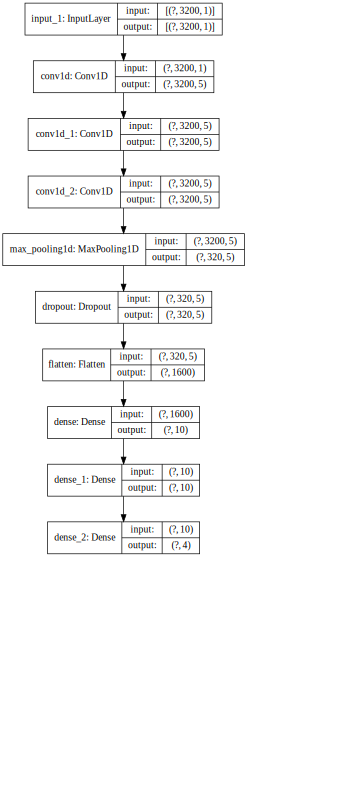

In [0]:
Numero_Datos, ancho_1, alto_1, =x_train_1.shape

modelo1 = crearModelo_1D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer, T_entrada = ancho_1)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  hist = modelo1.fit(x_train_1, y_train, validation_data=(x_test_1, y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        

  #SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 60).create(prog='dot', format='svg'))


Train on 234649 samples, validate on 58663 samples
Epoch 1/100
234649/234649 [==============================] - 13s 56us/sample - loss: 0.8330 - sparse_categorical_accuracy: 0.7958 - val_loss: 0.6719 - val_sparse_categorical_accuracy: 0.8108
Epoch 2/100
234649/234649 [==============================] - 12s 52us/sample - loss: 0.6214 - sparse_categorical_accuracy: 0.8118 - val_loss: 0.5692 - val_sparse_categorical_accuracy: 0.8199
Epoch 3/100
234649/234649 [==============================] - 12s 52us/sample - loss: 0.5482 - sparse_categorical_accuracy: 0.8231 - val_loss: 0.5235 - val_sparse_categorical_accuracy: 0.8290
Epoch 4/100
234649/234649 [==============================] - 12s 52us/sample - loss: 0.5191 - sparse_categorical_accuracy: 0.8323 - val_loss: 0.5132 - val_sparse_categorical_accuracy: 0.8368
Epoch 5/100
234649/234649 [==============================] - 12s 52us/sample - loss: 0.4981 - sparse_categorical_accuracy: 0.8381 - val_loss: 0.4935 - val_sparse_categorical_accuracy: 0

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


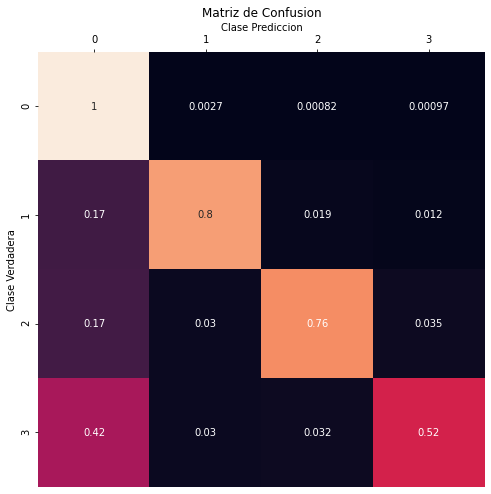

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo1.predict_classes(x_test_1))

# Modelo CNN 2D

In [0]:
def crearModelo2D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer, T_entrada_1, T_entrada_2):

  modelo = Sequential()

  modelo.add(Input(shape = (1,T_entrada_1,T_entrada_2)))

  modelo.add(Conv2D(pNumFiltros[0], (int(pTamFiltros[0]),int(pTamFiltros[0])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[1], (int(pTamFiltros[1]),int(pTamFiltros[1])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[2], (int(pTamFiltros[2]),int(pTamFiltros[2])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[3], (int(pTamFiltros[3]),int(pTamFiltros[3])), padding='same', activation = 'relu'))
  #modelo.add(Conv2D(pNumFiltros[4], (int(pTamFiltros[4]),int(pTamFiltros[4])), padding='same', activation = 'relu'))
  #modelo.add(Conv2D(pNumFiltros[5], (int(pTamFiltros[5]),int(pTamFiltros[5])), padding='same', activation = 'relu'))

  modelo.add(MaxPooling2D((int(pTamFiltros[1]),int(pTamFiltros[1])), padding='same'))



  modelo.add(Dropout(0.5))
  modelo.add(Flatten())

  modelo.add(Dense(pNumNeuronas[0], activation='relu'))
  modelo.add(Dense(pNumNeuronas[1], activation='relu'))
  modelo.add(Dense(pNumNeuronas[2], activation='relu'))
  #modelo.add(Dense(pNumNeuronas[3], activation='relu'))

  modelo.add(Dense(4, activation='softmax'))


  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([10, 10, 10, 10, 10, 512])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([2, 4, 4, 3, 3, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([4, 2, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([10, 10, 10, 16])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 1, 128, 16)        144       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 128, 32)        8224      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 128, 64)        32832     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 128, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 32, 128)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 32, 128)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)             

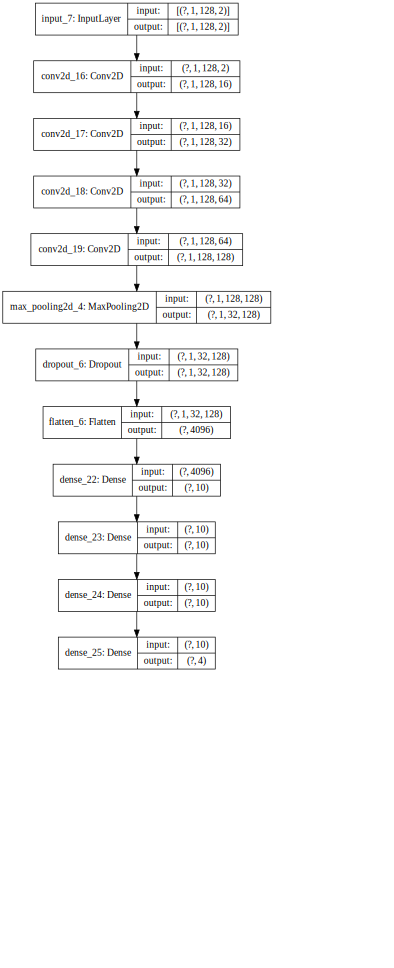

In [0]:
Numero_Datos, uno, alto_2, ancho_2=x_train_2.shape

modelo2 = crearModelo2D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer, T_entrada_1 = alto_2 , T_entrada_2 = ancho_2 )

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo2, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo2.fit(x_train_2, y_train, validation_data=(x_test_2, y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        

  #SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 60).create(prog='dot', format='svg'))

Train on 1019232 samples, validate on 254808 samples
Epoch 1/100
1019232/1019232 [==============================] - 31s 30us/sample - loss: 0.5502 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.3916 - val_sparse_categorical_accuracy: 0.8936
Epoch 2/100
1019232/1019232 [==============================] - 29s 29us/sample - loss: 0.3560 - sparse_categorical_accuracy: 0.8995 - val_loss: 0.3160 - val_sparse_categorical_accuracy: 0.9143
Epoch 3/100
1019232/1019232 [==============================] - 32s 32us/sample - loss: 0.2779 - sparse_categorical_accuracy: 0.9234 - val_loss: 0.2572 - val_sparse_categorical_accuracy: 0.9281
Epoch 4/100
1019232/1019232 [==============================] - 32s 32us/sample - loss: 0.2368 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.1926 - val_sparse_categorical_accuracy: 0.9504
Epoch 5/100
1019232/1019232 [==============================] - 29s 29us/sample - loss: 0.2123 - sparse_categorical_accuracy: 0.9436 - val_loss: 0.1796 - val_sparse_categorical

KeyboardInterrupt: ignored

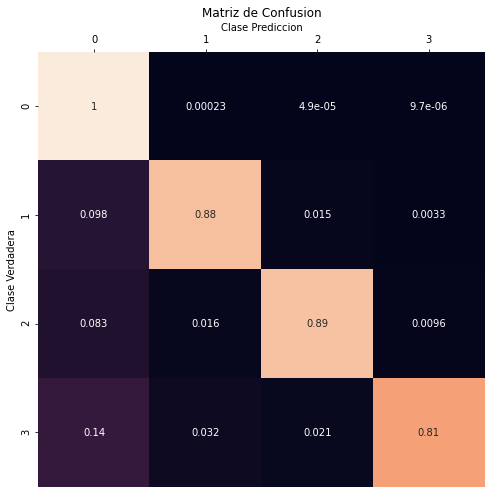

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo2.predict_classes(x_test_2))

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo2.predict_classes(x_test_2))

# Modelo CNN 1D y 2D

In [0]:
def crearModelo_1D_y_2D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer, T_entrada_1, T_entrada_2, T_entrada_3):
  # CONV 1D
  capaEntrada_1 = Input(shape = (T_entrada_3,1))

  capa1_1 = Conv1D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada_1)
  pooling1_1 = MaxPooling1D(int(pTamPooling[0]), padding='same')(capa1_1)

  capa2_1 = Conv1D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(pooling1_1)
  pooling2_1 = MaxPooling1D(int(pTamPooling[1]), padding='same')(capa2_1)
  
  flatten_1 = Flatten()(pooling2_1)

  # CONV 2D
  capaEntrada_2 = Input(shape = (1,T_entrada_1,T_entrada_2))

  capa1_2 = Conv2D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada_2)
  pooling1_2 = MaxPooling2D(int(pTamPooling[0]), padding='same')(capa1_2)

  capa2_2 = Conv2D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(pooling1_2)
  pooling2_2 = MaxPooling2D(int(pTamPooling[1]), padding='same')(capa2_2)
  
  flatten_2 = Flatten()(pooling2_2)


  capas = concatenate([flatten_1, flatten_2])

  capas = Dropout(0.5)(capas)
  
  capas = Dense(pNumNeuronas[0], activation='relu')(capas)
  capas = Dense(pNumNeuronas[1], activation='relu')(capas)

  capaSalida = Dense(4, activation='softmax')(capas)

  #modelo = Sequential()
  modelo = Model(inputs = [capaEntrada_1, capaEntrada_2], outputs = capaSalida)

  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([5, 10, 10, 10, 10, 10])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([10, 10, 10, 8, 8, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([5, 5, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([4, 4, 10])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

In [0]:
Numero_Datos, ancho_1, alto_1, =x_train_1.shape
Numero_Datos, uno, alto_2, ancho_2=x_train_2.shape

modelo3 = crearModelo_1D_y_2D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer,T_entrada_1=alto_2, T_entrada_2=ancho_2, T_entrada_3=ancho_1)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo3, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo3.fit([x_train_1,x_train_2], y_train, validation_data=([x_test_1,x_test_2], y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        


In [0]:
y_prob = modelo3.predict ([x_test_1,x_test_2])
y_pred_=y_prob.argmax(axis=-1)
graficarMatrizConfusion(y_true=y_test, y_pred=y_pred_)

In [0]:
y_prob = modelo3.predict ([x_test_1,x_test_2])
y_pred_=y_prob.argmax(axis=-1)
graficarMatrizConfusion(y_true=y_test, y_pred=y_pred_)

# Pruebas

(128, 20)


/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


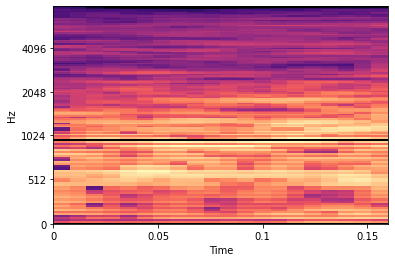

In [0]:
frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
ps = librosa.feature.melspectrogram(y=frameData[0:1000], sr=fs, n_fft = 335, hop_length = int(50) )
print(ps.shape)
S_dB = librosa.power_to_db(ps, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                        y_axis='mel', sr=fs,hop_length=int(512/4),
                          fmax=8000)



16000
(13, 81)
[-636.97328165  112.89538908  -55.27235917  -39.35811879  -26.96385187
   14.45549824  -17.89835475   14.50935849  -10.4594912    -2.75587904
  -11.64079737    4.61169338  -23.34611949]
[148.17815613  50.86374099  84.80027241  17.56353333 103.31218257
  39.67582151  38.52561358  55.89333215  26.13029353  23.96737997
  26.78672775  43.68347741  23.70562007]


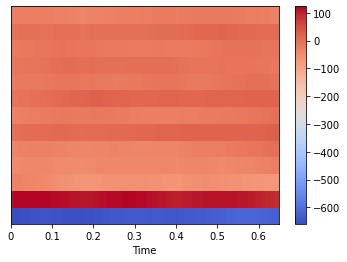

In [0]:
frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
ps = librosa.feature.mfcc(y=frameData[0:800], sr=fs, n_mfcc=13, n_fft = 490, hop_length = 10, htk=True )
#ps = preprocessing.scale(ps, axis=1)
print(fs)
print(ps.shape)
print (ps.mean(axis=1))
print (ps.var(axis=1))

#S_dB = librosa.power_to_db(ps, ref=np.max)
librosa.display.specshow(ps, x_axis='time', sr=fs,hop_length=int(512/4))
plt.colorbar()